In [1]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from Value import Value
from activation import * 
from init import he_init
from Layer import Layer
from FFNN import FFNN
from loss import cce_loss  
from sklearn.metrics import accuracy_score
from visualize import plot_training_comparison, plot_weight_distribution

def one_hot_encode(y, num_classes=10):
    """
    Konversi array label ke one-hot encoding.
    y: array dengan shape (n_samples, 1) atau (n_samples,)
    """
    y = y.flatten().astype(int)
    one_hot = np.zeros((y.shape[0], num_classes))
    one_hot[np.arange(y.shape[0]), y] = 1
    return one_hot

X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)

X = X.astype(np.float32) / 255.0

y = y.astype(np.int32)

y_onehot = one_hot_encode(y, num_classes=10)

X_train, X_val, y_train, y_val = train_test_split(X, y_onehot, test_size=0.2, random_state=42)

X_train = Value(X_train)
y_train = Value(y_train)
X_val = Value(X_val)
y_val = Value(y_val)

# Definisikan arsitektur model.
# Karena MNIST memiliki 784 fitur, layer pertama menggunakan 784 neuron.
# Output layer memiliki 10 neuron dengan fungsi aktivasi softmax.
layers = [
    Layer(784, 128, activation=relu, weight_init=he_init),
    Layer(128, 32, activation= relu, weight_init=he_init),
    Layer(32, 10, activation=softmax, weight_init=he_init)
]

model = FFNN(layers=layers, loss_fn=cce_loss, lr=0.01)

training_history = model.train(
    training_data=X_train,
    training_target=y_train,
    max_epoch=20,
    error_threshold=0.01,
    batch_size=64,
    validation_data=X_val,
    validation_target=y_val,
    verbose=True
)

print("Training Loss History:", training_history['training_loss_history'])
print("Validation Loss History:", training_history['validation_loss_history'])

Epoch 1/20: Training Loss = 0.8079383043902261, Validation Loss = 0.40405811723862256
Epoch 2/20: Training Loss = 0.352429055588586, Validation Loss = 0.3209249824899541
Epoch 3/20: Training Loss = 0.2945465637786048, Validation Loss = 0.28380110945076925
Epoch 4/20: Training Loss = 0.2612369482261794, Validation Loss = 0.25885942624315
Epoch 5/20: Training Loss = 0.2369479063110692, Validation Loss = 0.2399387209475754
Epoch 6/20: Training Loss = 0.21759533287797655, Validation Loss = 0.22461172507878746
Epoch 7/20: Training Loss = 0.20141961433632033, Validation Loss = 0.21171363614079355
Epoch 8/20: Training Loss = 0.1876089010792119, Validation Loss = 0.200832105486428
Epoch 9/20: Training Loss = 0.17567483006630624, Validation Loss = 0.19126893589327382
Epoch 10/20: Training Loss = 0.16519473434771811, Validation Loss = 0.18281536944236954
Epoch 11/20: Training Loss = 0.15591705061708178, Validation Loss = 0.17533890058859836
Epoch 12/20: Training Loss = 0.14762379334867, Validati

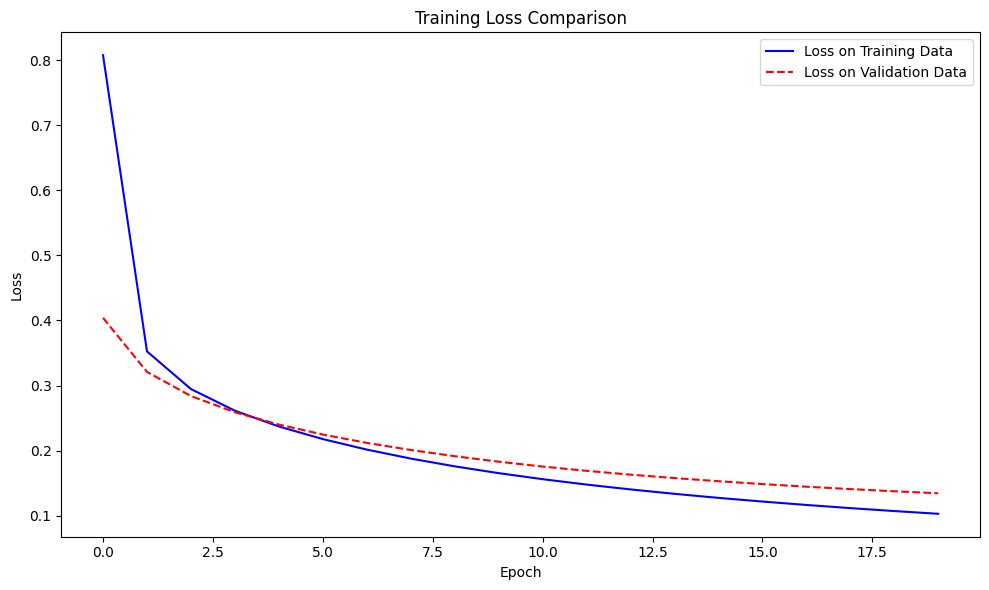

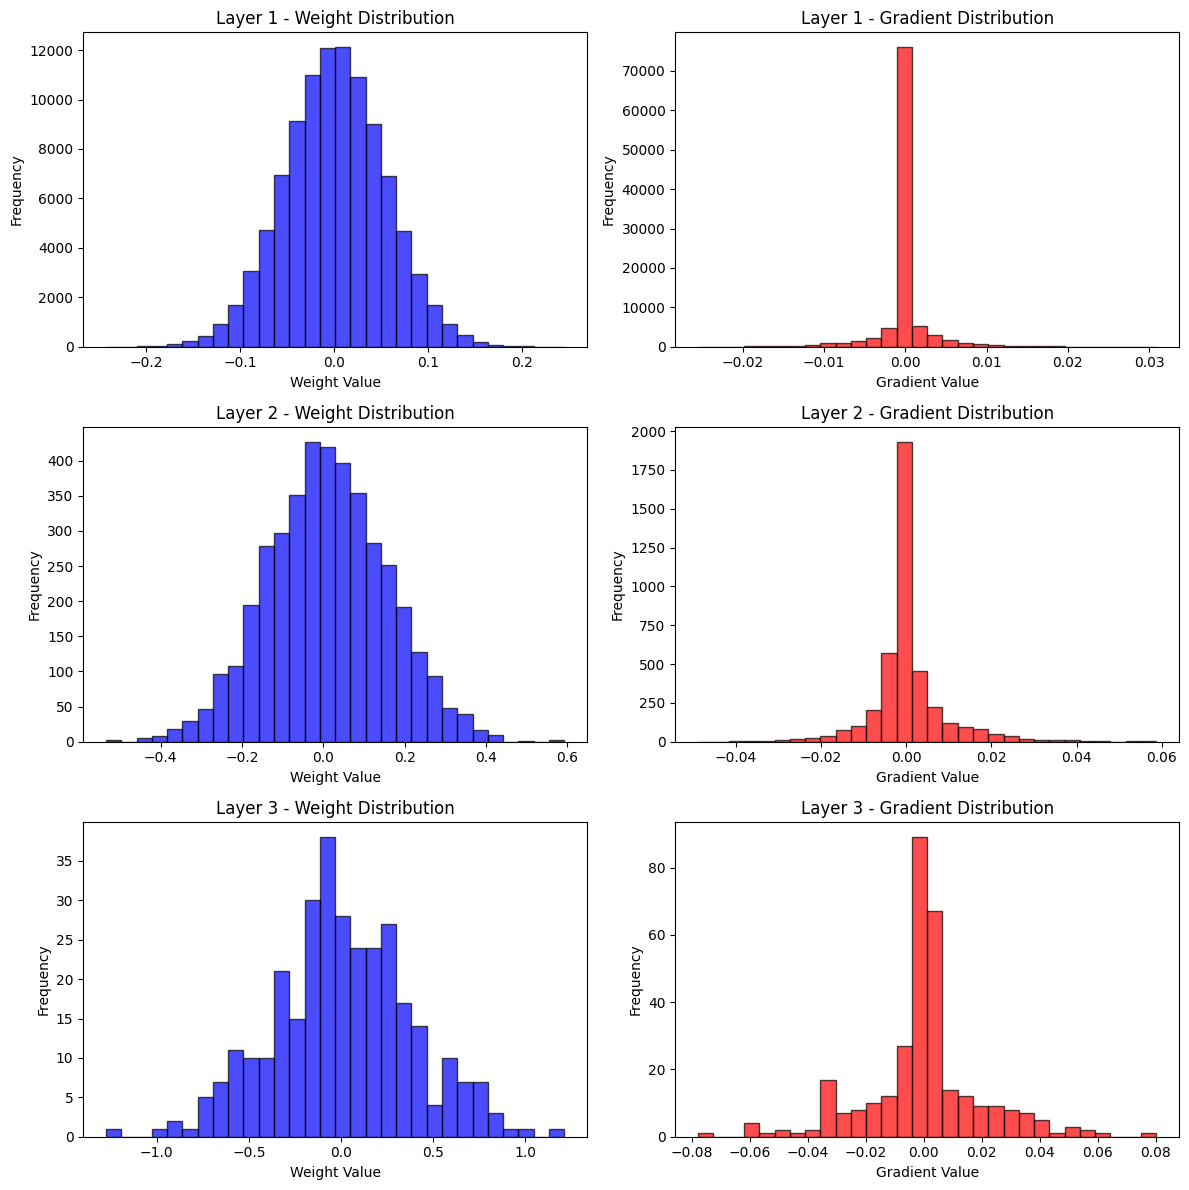

In [2]:
plot_training_comparison(training_history)
plot_weight_distribution(model)

In [3]:
pred = model(X_val)
pred = np.argmax(pred.data, axis=1)

In [4]:
def decode(y_onehot):
    return np.argmax(y_onehot, axis=1)
y_val = decode(y_val.data)
accuracy = accuracy_score(y_val, pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 96.21%
